[View in Colaboratory](https://colab.research.google.com/github/zzune/KerasBasic/blob/master/Chapter3_1_history.ipynb)

In [1]:
#0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [2]:
#1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
#3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [0]:
#4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val))

케라스에서 학습시킬 때 fit() 함수를 사용한다. 이 함수의 반환 값으로 히스토리 객체를 얻을 수 있는데, 이 객체는 다음의 정보를 담고 있다.
- 매 에포크 마다의 훈련 손실값(loss)
- 매 에포크 마다의 훈련 정확도(acc)
- 매 에포크 마다의 검증 손실값(val_loss)
- 매 에포크 마다의 검증 정확도(val_acc)
수치들은 각 에포크마다 해당 값이 추가되므로 배열 형태로 저장되어 있다.

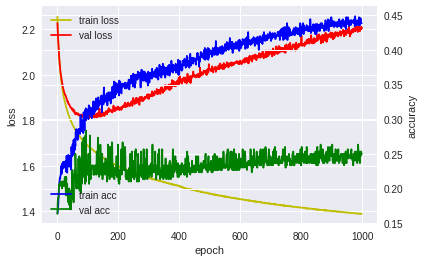

In [7]:
#5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

검증셋의 손실값(val loss)이 감소하다가 100번째 에포크에서 다시 증가되는 양상을 보인다.
과적합(overfitting)이 발생했다고 볼 수 있다.